In [1]:
%matplotlib notebook
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os

In [2]:
def generate_images():
    for dataset in os.listdir("data"):
        print(dataset)
        for file in os.listdir(os.path.join("data", dataset)):
            if file.endswith('.vti'):
                data_file = os.path.join(os.path.join("data", dataset), file)
                print("Reading data and saving image for " + data_file + " ...")
                data = pv.read(data_file)
                water = np.array(data['v02'])
                water_3d = water.reshape(300, 300, 300)
                
                x_slice = water_3d[int(len(water_3d) / 2)]
                x_water_plot = plt.subplot()
                x_water_plot.imshow(x_slice)
                x_water_plot.invert_yaxis()
                
                imgfilename = os.path.splitext(file)[0] + ".png"
                imgdirname = os.path.join(os.path.join("images", dataset), "x")
                if not os.path.exists(imgdirname):
                    os.makedirs(imgdirname)
                imgfile = os.path.join(imgdirname, imgfilename)
                plt.savefig(imgfile)
                
                # y_slice = water_3d[int(len(water_3d) / 2)]
                
                y_slice = water_3d[:, :, int(len(water_3d) / 2)]
                slic = np.rot90(y_slice, 3)
                y_water_plot = plt.subplot()
                y_water_plot.imshow(slic)
                y_water_plot.invert_yaxis()
                
                imgfilename = os.path.splitext(file)[0] + ".png"
                imgdirname = os.path.join(os.path.join("images", dataset), "y")
                if not os.path.exists(imgdirname):
                    os.makedirs(imgdirname)
                imgfile = os.path.join(imgdirname, imgfilename)
                plt.savefig(imgfile)
                
                z_slice = water_3d[:, int(len(water_3d) / 2), :]
                z_water_plot = plt.subplot()
                z_water_plot.imshow(z_slice)
                z_water_plot.invert_yaxis()
                
                imgfilename = os.path.splitext(file)[0] + ".png"
                imgdirname = os.path.join(os.path.join("images", dataset), "z")
                if not os.path.exists(imgdirname):
                    os.makedirs(imgdirname)
                imgfile = os.path.join(imgdirname, imgfilename)
                plt.savefig(imgfile)

                print("Done!")

In [6]:
def show_stuff():
    # axis dictionary
    ax_dict = dict(x=0,y=1,z=2)
    data_sets = []
    for data_set in os.listdir("images"):
        data_sets.append(data_set)

    # widgets for axis dropdown and timestep value
    data_set_widget=widgets.Dropdown(options=data_sets, value=data_sets[0], description='Data Set:')
    ax_widget=widgets.Dropdown(options=['x', 'y', 'z'], value='x', description='Axis:')
    time_widget=widgets.IntSlider(min=0, max=20, step=1, value=0, description='Timestep', continuous_update=False)

    def update_max_slice(dataset, ax):
        time_widget.max = len(os.listdir(os.path.join(os.path.join("images", dataset), ax))) - 1

    # function to show slice
    def display_slice(ax, num, dataset):
        update_max_slice(dataset, ax)
        dur = "images/" + dataset + "/" + ax + "/"
        plt.imshow(mpimg.imread(os.path.join(dur, os.listdir(dur)[num])))
        plt.axis('off')
        plt.show()

    plt.figure()
    plt.title("Deep Water Impacts")
    interact(display_slice, dataset=data_set_widget, ax=ax_widget, num=time_widget)


<IPython.core.display.Javascript object>


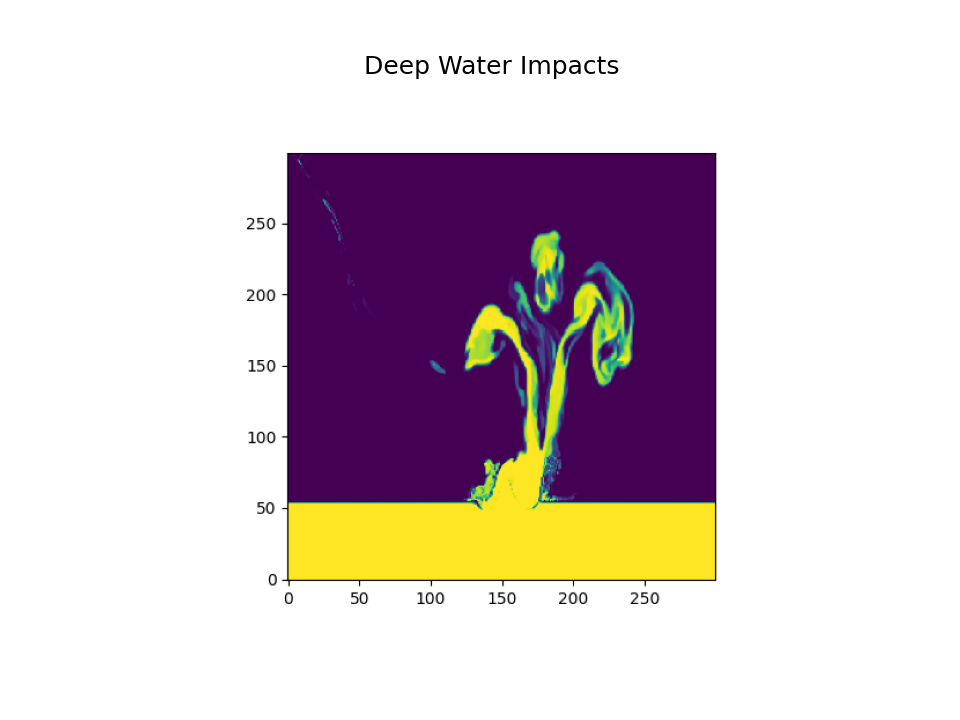

interactive(children=(Dropdown(description='Axis:', options=('x', 'y', 'z'), value='x'), IntSlider(value=0, co…

In [7]:
#generate_images()
show_stuff()
# img = mpimg.imread("a32\images\pv_insitu_300x300x300_048209.png")
# imgplot = plt.imshow(img)
# plt.show()